In [1]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25834 sha256=e930d52b9291bf35f44d22a0055da813626880ae4746ba6d2c9b6e0c459e00b5
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [2]:
import os
import random
from random import choices, sample

import numpy as np
from numpy import *

import cv2
import matplotlib.pyplot as plt
import imutils
from imutils import contours


from skimage import measure
from tqdm.auto import tqdm
from PIL import Image
from glob import glob

In [3]:
def same_seeds(seed):
    random.seed(seed)
    np.random.seed(seed)
same_seeds(1314)

In [4]:
same_seeds(1314)
class GCM:
    def __init__(self, path):
        self.path = path

    def myRound(self, n):
        # Custom rounding function
        answer = round(n)
        if not answer % 2:
            return answer
        if abs(answer + 1 - n) < abs(answer - 1 - n):
            return answer + 1
        else:
            return answer - 1

    def gradient_Convergence(self, sum_data, range_low, range_high, batchsize, learning_rate, weight):
        n = abs(sum_data / batchsize - (range_low + range_high) / 2) * lr * weight

        if sum_data / batchsize > (range_low + range_high) / 2 and (range_low + self.myRound(n)) < range_high:
            range_low = range_low + self.myRound(n)
        elif sum_data / batchsize < (range_low + range_high) / 2 and (range_high - self.myRound(n)) > range_low:
            range_high = range_high - self.myRound(n)

        return range_low, range_high

    def shape_Detection(self,blocksize ,C ,pixel_limits ,thresh_2, tileGridSize ,gsize):

        image = cv2.imread(self.path)
        image_copy = image.copy()
        imgGray = cv2.imread(path, flags=0)  
        clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(tileGridSize, tileGridSize))
        img_norm = clahe.apply(imgGray)



        thresh = cv2.adaptiveThreshold(img_norm, 520, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, blocksize, C)



        blurred = cv2.GaussianBlur(thresh, (gsize, gsize), 0)


        thresh = cv2.threshold(blurred, thresh_2, 255, cv2.THRESH_BINARY)[1]


        
        
        labels = measure.label(thresh, connectivity=None, background=0)
        mask = np.zeros(thresh.shape, dtype="uint8")
        round_mask = np.zeros(thresh.shape, dtype="uint8")
        # loop over the unique components


        pixel_nums = 0
        for label in np.unique(labels):
            # if this is the background label, ignore it
            if label == 0:
                continue
            labelMask = np.zeros(thresh.shape, dtype="uint8")
            labelMask[labels == label] = 255
            numPixels = cv2.countNonZero(labelMask)
            # if the number of pixels in the component is sufficiently
            # large, then add it to our mask of "large blobs"
            if  numPixels > pixel_limits:
                mask = cv2.add(mask, labelMask)
        area_list = []

        cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
        mskcnts, hierarchy = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
        cnts = imutils.grab_contours(cnts)
        if cnts:
            cnts = contours.sort_contours(cnts)[0]
                # loop over the contours

            for (i, c) in enumerate(cnts):
                    # draw the bright spot on the image
                (x, y, w, h) = cv2.boundingRect(c)
                ((cX, cY), radius) = cv2.minEnclosingCircle(c)
                area_list = np.append(area_list, radius)
                cv2.drawContours(image_copy, mskcnts, -1, (0, 0, 255), 1)
                cv2.circle(image, (int(cX), int(cY)), int(radius),
                               (0, 0, 255), 1)

        else:
            i = 0

        dot_num = i

        return (dot_num, mask)
    
    def train(self, epoch, batchsize, lower_limit, upper_limit,learning_rate, weight,
              blocksize_range_down, blocksize_range_up,
              C_list_range_down, C_list_range_up,
              pixel_limits_range_range_down, pixel_limits_range_range_up,
              blurred_range_down, blurred_range_up,thresh_2_range_down,thresh_2_range_up,tileGridSize_range_down,tileGridSize_range_up):
        
        

        for i in range(epoch):
            positive_data = 0
            
            range_hat_list = sample(range(batchsize), k=batchsize)
            
            blocksize_range = arange(blocksize_range_down,blocksize_range_up+2,2)  
            blocksize_list = choices(blocksize_range,k = batchsize)
            C_list = np.random.randint(C_list_range_down,C_list_range_up+1,size=batchsize +1) 
            pixel_limits_range = arange(pixel_limits_range_range_down,pixel_limits_range_range_up+1,1)  
            pixel_limits_list = choices(pixel_limits_range,k = batchsize)
            thresh_2_range = arange(thresh_2_range_down,thresh_2_range_up+1,1)  
            thresh_2_list = choices(thresh_2_range,k = batchsize)
            tileGridSize_range = arange(tileGridSize_range_down,tileGridSize_range_up+1,1)  
            tileGridSize_list = choices(tileGridSize_range,k = batchsize)
            blurred_range = arange(blurred_range_down,blurred_range_up+2,2)  
            blurred_list = choices(blurred_range,k = batchsize)

            for j in tqdm(range(batchsize) ):

                range_hat = range_hat_list[j]
                pixel_limits = pixel_limits_list[range_hat]
                C = C_list[range_hat]
                thresh_2 = thresh_2_list[range_hat]
                blocksize = blocksize_list[range_hat]
                tileGridSize = tileGridSize_list[range_hat]
                gsize = blurred_list[range_hat]
#                 print(gsize)
        
                dot_num,mask = self.shape_Detection(blocksize ,C ,pixel_limits ,thresh_2, tileGridSize ,gsize)


                if (dot_num > lower_limit) and (dot_num < upper_limit):
#               and black[741,442].all() == 0 and black[714,356].all() == 0         # add if you want to fine_tuning，change to your select point.
                    positive_data += 1
                    datasize = 1
                    sum_C = int(C)
                    sum_B = int(blocksize)
                    sum_P = int(pixel_limits)
                    sum_G = gsize
                    sum_R = tileGridSize
                    sum_T = int(thresh_2)
                    
                    C_list_range_down,C_list_range_up = self.gradient_Convergence(sum_C,C_list_range_down,C_list_range_up, datasize, learning_rate, weight)
                    blocksize_range_down, blocksize_range_up = self.gradient_Convergence(sum_B,blocksize_range_down, blocksize_range_up, datasize, learning_rate, weight)
                    pixel_limits_range_range_down, pixel_limits_range_range_up = self.gradient_Convergence(sum_P,pixel_limits_range_range_down, pixel_limits_range_range_up, datasize, learning_rate, weight)
                    blurred_range_down, blurred_range_up = self.gradient_Convergence(sum_G,blurred_range_down, blurred_range_up, datasize, learning_rate, weight)
                    tileGridSize_range_down, tileGridSize_range_up = self.gradient_Convergence(sum_R,tileGridSize_range_down, tileGridSize_range_up, datasize, learning_rate, weight)
                    thresh_2_range_down, thresh_2_range_up = self.gradient_Convergence(sum_T,thresh_2_range_down, thresh_2_range_up, datasize, learning_rate, weight)

            loss = 1 - positive_data/batchsize


            print(loss)
            print(f"{i}/{epoch}")
            if loss < 0.1:
                break
                
        return blocksize ,C ,pixel_limits ,thresh_2, tileGridSize ,gsize

In [5]:
blocksize_range_down,blocksize_range_up = 3,139
C_list_range_down,C_list_range_up = -95,-5
pixel_limits_range_range_down,pixel_limits_range_range_up = 1,160
thresh_2_range_down,thresh_2_range_up = 30,250
tileGridSize_range_down,tileGridSize_range_up = 1,60
blurred_range_down,blurred_range_up = 1,23

In [6]:
k = 2
lr = 0.5
weight = 1
epoch = 10
batchsize = 100
lower_limit = 20
upper_limit = 1800
data_folder = '/kaggle/input/helium-bubble-dataset'

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

0.5
0/10


  0%|          | 0/100 [00:00<?, ?it/s]

0.0
1/10


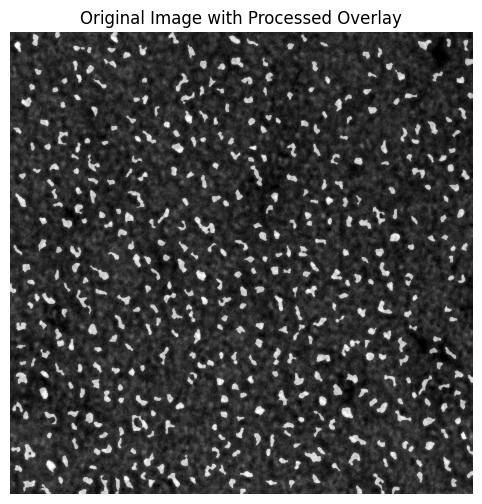

  0%|          | 0/100 [00:00<?, ?it/s]

0.56
0/10


  0%|          | 0/100 [00:00<?, ?it/s]

0.0
1/10


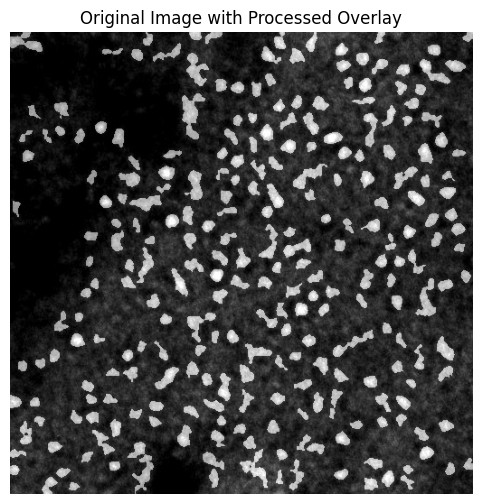

  0%|          | 0/100 [00:00<?, ?it/s]

0.39
0/10


  0%|          | 0/100 [00:00<?, ?it/s]

0.0
1/10


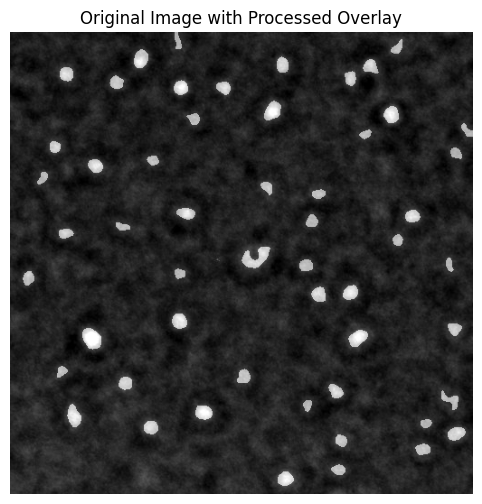

  0%|          | 0/100 [00:00<?, ?it/s]

0.61
0/10


  0%|          | 0/100 [00:00<?, ?it/s]

0.0
1/10


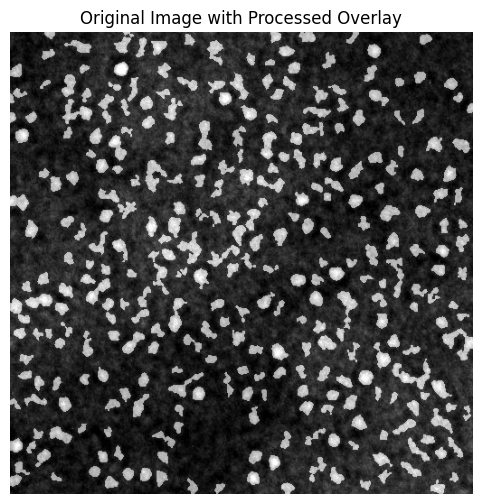

  0%|          | 0/100 [00:00<?, ?it/s]

0.47
0/10


  0%|          | 0/100 [00:00<?, ?it/s]

0.0
1/10


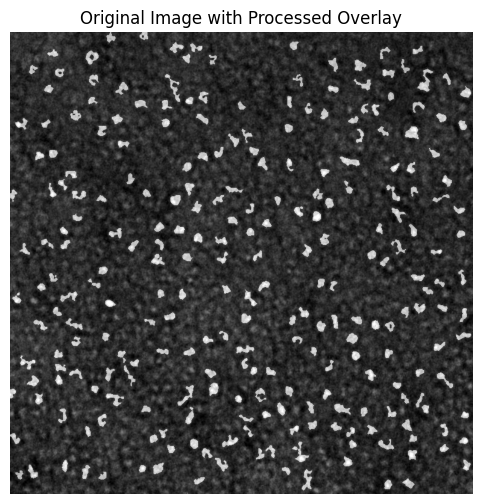

  0%|          | 0/100 [00:00<?, ?it/s]

0.42000000000000004
0/10


  0%|          | 0/100 [00:00<?, ?it/s]

0.0
1/10


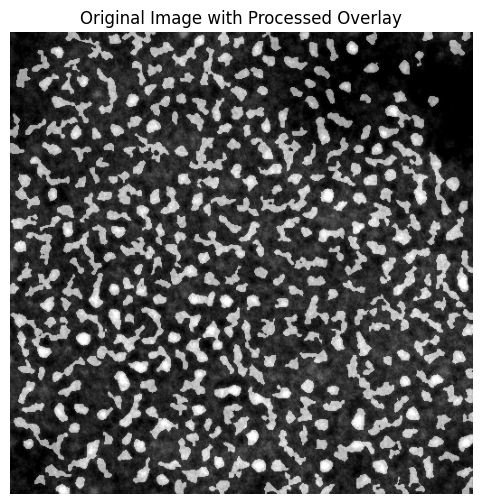

  0%|          | 0/100 [00:00<?, ?it/s]

0.39
0/10


  0%|          | 0/100 [00:00<?, ?it/s]

0.0
1/10


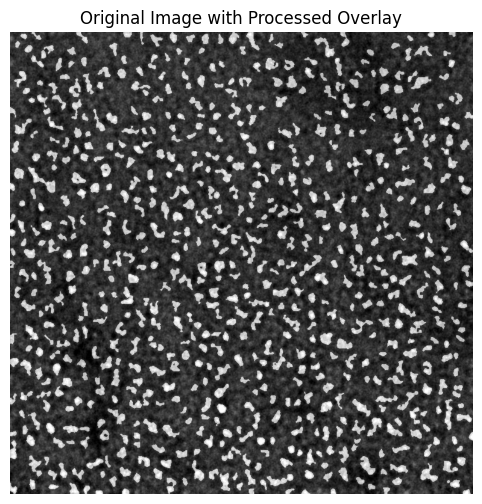

  0%|          | 0/100 [00:00<?, ?it/s]

0.45999999999999996
0/10


  0%|          | 0/100 [00:00<?, ?it/s]

0.0
1/10


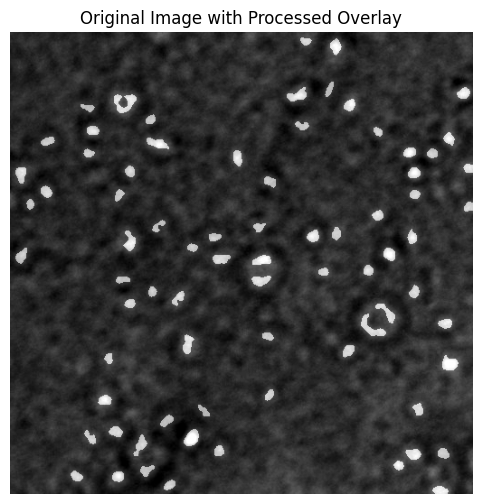

  0%|          | 0/100 [00:00<?, ?it/s]

0.62
0/10


  0%|          | 0/100 [00:00<?, ?it/s]

0.0
1/10


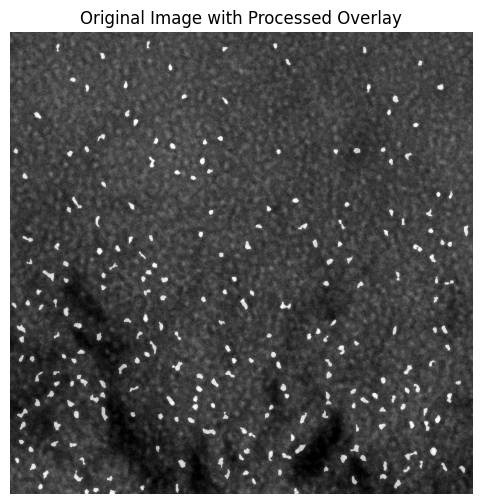

In [7]:
import os
import matplotlib.pyplot as plt
import numpy as np

same_seeds(314)

image_paths = []
for root, directories, files in os.walk(data_folder):
    for name in tqdm(files):
        if name.endswith(".jpg"):
            path = (os.path.join(root, name))

            gcm = GCM(path=path)
            a, b, c, d, e, f = gcm.train(epoch=epoch,
                                   batchsize=batchsize,
                                   lower_limit=lower_limit,
                                   upper_limit=upper_limit,
                                   learning_rate=lr,
                                   weight=weight,
                                   blocksize_range_down=blocksize_range_down,
                                   blocksize_range_up=blocksize_range_up,
                                   C_list_range_down=C_list_range_down,
                                   C_list_range_up=C_list_range_up,
                                   pixel_limits_range_range_down=pixel_limits_range_range_down,
                                   pixel_limits_range_range_up=pixel_limits_range_range_up,
                                   blurred_range_down = blurred_range_down,
                                   blurred_range_up=blurred_range_up,
                                   thresh_2_range_down = thresh_2_range_down,
                                   thresh_2_range_up = thresh_2_range_up,
                                   tileGridSize_range_down = tileGridSize_range_down,
                                   tileGridSize_range_up = tileGridSize_range_up                                                                            
                                   )
            g, label = gcm.shape_Detection(a, b, c, d, e, f)
            labelimg = Image.fromarray(label)

            save_dir = "/kaggle/working/output"
            
            if not os.path.exists(save_dir):
                os.makedirs(save_dir)
            filename = os.path.basename(path)  
            filename_without_ext = os.path.splitext(filename)[0]  
            save_path = os.path.join(save_dir, f"{filename_without_ext}.png") 

            # Save the processed image
            labelimg.save(save_path)

            # Display the original image and the processed image
            # Define the original image
            original_img = cv2.imread(path)

            # Define the processed image
            processed_img = cv2.imread(save_path)

            # Convert the images to grayscale
            original_gray = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)
            processed_gray = cv2.cvtColor(processed_img, cv2.COLOR_BGR2GRAY)

            # Convert the grayscale images to floating-point arrays
            original_gray = original_gray.astype(np.float32)
            processed_gray = processed_gray.astype(np.float32)

            # Create a weighted average of the two images
            overlay = cv2.addWeighted(original_gray, 0.5, processed_gray, 0.5, 0)

            # Convert the overlay back to a uint8 array
            overlay = overlay.astype(np.uint8)

            # Display the overlay
            fig, ax = plt.subplots(figsize=(12, 6))
            ax.imshow(overlay, cmap='gray')
            ax.set_title('Original Image with Processed Overlay')
            ax.axis('off')

            plt.show()

In [8]:
import zipfile


with zipfile.ZipFile('output.zip', 'w') as zipObj:

    for folderName, subfolders, filenames in os.walk('/kaggle/working/output'):
        for filename in filenames:

            zipObj.write(os.path.join(folderName, filename), os.path.basename(filename))